#**Using Logistic Regression, Support Vector Machines and Random Forest for classification on the *Iris dataset***

This notebook explores the application of three popular machine learning algorithms—Logistic Regression, Support Vector Machines (SVMs), and Random Forest—for solving a classification problem on the Iris dataset.

The Iris dataset is a classic, simple, and well-structured dataset that is frequently used as an introductory example in machine learning. It contains observations of iris flowers, with features such as sepal length, sepal width, petal length, and petal width, and the task is to classify each observation into one of three species: setosa, versicolor, or virginica.

##Loading and visualizing the data

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [12]:
iris = datasets.load_iris()

print(f'feature names: {iris.feature_names} \n'
      f'target names: {iris.target_names}')

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
target names: ['setosa' 'versicolor' 'virginica']


In [16]:
X = iris.data
y = iris.target

print(f'X class: {X.__class__.__name__}\n'
      f'X shape: {X.shape}\n'
      f'X dtype: {X.dtype}')
print(f'y class: {y.__class__.__name__}\n'
      f'y shape: {y.shape}\n'
      f'y dtype: {y.dtype}')

X class: ndarray
X shape: (150, 4)
X dtype: float64
y class: ndarray
y shape: (150,)
y dtype: int64


Extract only 'petal length' and 'petal witdh'

In [17]:
X = X[:, [2,3]]
print(f'X class: {X.__class__.__name__}\n'
      f'X shape: {X.shape}\n'
      f'X dtype: {X.dtype}')

X class: ndarray
X shape: (150, 2)
X dtype: float64


In [19]:
# class labels
np.unique(y)

array([0, 1, 2])

Split data and standardize

In [21]:
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [34]:
print('Lables count in y_train: ', np.bincount(y_train))
print('Labels count in y_test: ', np.bincount(y_test))

Lables count in y_train:  [35 35 35]
Labels count in y_test:  [15 15 15]


In [40]:
# prev. to standardization
min_xtrain, max_xtrain = X_train.min(), X_train.max()
print(f'({min_xtrain}, {max_xtrain})')

(0.1, 6.9)


In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [41]:
# post. standardization
min_xtr_std, max_xtr_std = X_train_std.min(), X_train_std.max()
print(f'({min_xtr_std}, {max_xtr_std})')

(-1.5557872688145624, 1.734790447233992)


##Training models

Code for visualizing decision regions

In [43]:
from matplotlib.colors import ListedColormap

In [65]:
def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.2):
    # Setup markers and color map
    markers = ('o', 's', '^', 'v', '<')
    colors  = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x0_min, x0_max = \
        X[:, 0].min() - 1, X[:, 0].max() + 1 #-- with margin
    x1_min, x1_max = \
        X[:, 1].min() - 1, X[:, 1].max() + 1 #-- with margin
    #-- first feature vs. second feature grid
    xx0, xx1 = np.meshgrid(np.arange(start=x0_min,
                                     stop=x0_max,
                                     step=resolution),
                           np.arange(start=x1_min,
                                     stop=x1_max,
                                     step=resolution))
    labels = classifier.predict(
        np.array([xx0.ravel(), xx1.ravel()]).T)
    labels = labels.reshape(xx0.shape)
    plt.contourf(xx0, xx1, labels, alpha=0.3, cmap=cmap)
    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())

    # Plot class examples
    for idx, clss in enumerate(np.unique(y)):
        plt.scatter(x=X[y == clss, 0],
                    y=X[y == clss, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {clss}',
                    edgecolor='black')

    # Highlight test examples (optional)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(x=X_test[:, 0], y=X_test[:, 1],
                    c='none', marker='o', alpha=1.0,
                    edgecolor='black', linewidth=1,
                    s=100, label='Test set')

    plt.title(f'Decision boundaries for '
              f'{classifier.__class__.__name__}')
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [55]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print(f'X_train_std shape: {X_train_std.shape}\n'
      f'X_test_std.shape: {X_test_std.shape}\n'
      f'X_combined shape: {X_combined_std.shape}')

X_train_std shape: (105, 2)
X_test_std.shape: (45, 2)
X_combined shape: (150, 2)


###Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

| **solver**  	| **penalty** 	| **multinomial multiclass** 	|
|-------------	|-------------	|----------------------------	|
|   ‘lbfgs’   	|  ‘l2’, None 	|             yes            	|
| ‘newton-cg’ 	|  ‘l2’, None 	|             yes            	|
|    ‘sag’    	|  ‘l2’, None 	|             yes            	|

In [49]:
lr = LogisticRegression(solver='lbfgs').fit(X_train_std, y_train)

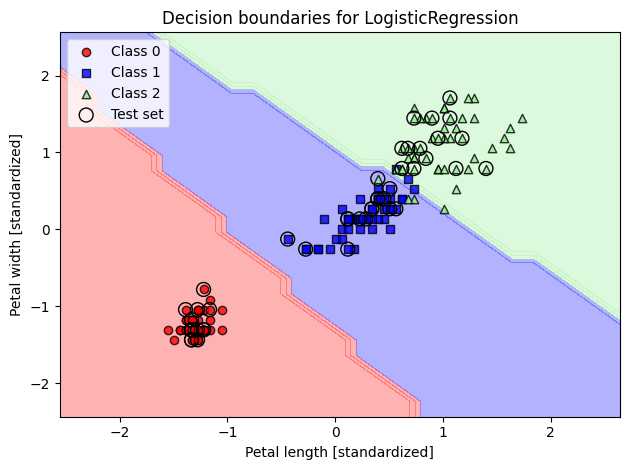

In [66]:
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))

In [67]:
y_pred = lr.predict(X_test_std)
print(f'Misclassified examples: {(y_pred != y_test).sum()}')

Misclassified examples: 1


In [68]:
print(f'Accuracy: {lr.score(X_test_std, y_test):.3f}')

Accuracy: 0.978


Let's try varying the <tt>C</tt> parameter (default <tt>C=1.0</tt>):

In [74]:
Cs = [2.0, 10.0, 100.0, 1000.0]
for C in Cs:
    lrC = LogisticRegression(C=C, solver='lbfgs').fit(X_train_std, y_train)
    print(f'Accuracy: {lrC.score(X_test_std, y_test):.3f}')
    print(f'C: {C}, Coefficients:\n {lrC.coef_}')
    print('------------------------------')

Accuracy: 0.978
C: 2.0, Coefficients:
 [[-2.87053989 -2.52313642]
 [-0.08917327 -0.29645372]
 [ 2.95971316  2.81959013]]
------------------------------
Accuracy: 0.978
C: 10.0, Coefficients:
 [[-4.35141672 -3.76361572]
 [-0.75199422 -0.27044468]
 [ 5.10341094  4.03406039]]
------------------------------
Accuracy: 0.978
C: 100.0, Coefficients:
 [[-6.94350471 -5.88178467]
 [-2.01585607  0.03216446]
 [ 8.95936078  5.84962021]]
------------------------------
Accuracy: 0.978
C: 1000.0, Coefficients:
 [[-9.05087125 -7.55371211]
 [-2.50278575  0.42915505]
 [11.553657    7.12455706]]
------------------------------


Since the dataset is linearly separable, even a wide range of C values lead to the same decision boundary because the model doesn't face a trade-off between bias and variance :)

Let's try then varying the solver:

In [75]:
solvers = ['lbfgs', 'newton-cg', 'sag']
for solver in solvers:
    lrS = LogisticRegression(solver=solver).fit(X_train_std, y_train)
    print(f'Accuracy: {lrS.score(X_test_std, y_test):.3f}')
    print(f'C: {C}, Coefficients:\n {lrC.coef_}')
    print('------------------------------')

Accuracy: 0.978
C: 1000.0, Coefficients:
 [[-9.05087125 -7.55371211]
 [-2.50278575  0.42915505]
 [11.553657    7.12455706]]
------------------------------
Accuracy: 0.978
C: 1000.0, Coefficients:
 [[-9.05087125 -7.55371211]
 [-2.50278575  0.42915505]
 [11.553657    7.12455706]]
------------------------------
Accuracy: 0.978
C: 1000.0, Coefficients:
 [[-9.05087125 -7.55371211]
 [-2.50278575  0.42915505]
 [11.553657    7.12455706]]
------------------------------


###Support Vector Machines

In [76]:
from sklearn.svm import SVC

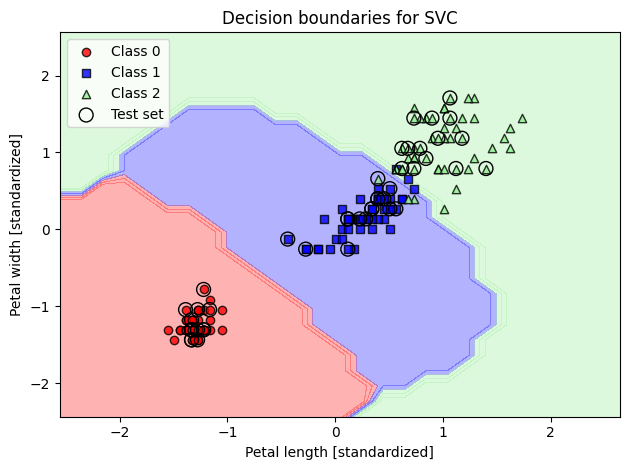

In [78]:
svc = SVC(gamma='auto').fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=svc,
                      test_idx=range(105, 150))

In [80]:
y_pred = svc.predict(X_test_std)
print(f'Misclassified examples: {(y_pred != y_test).sum()}')

Misclassified examples: 1


In [81]:
print(f'Accuracy: {svc.score(X_test_std, y_test):.3f}')

Accuracy: 0.978


Let's vary the <tt>kernel</tt> (default 'rbf') and the <tt>C</tt> parameter (default 1.0)

In [83]:
kernels = ['linear', 'poly', 'sigmoid']
Cs = [1.0, 10.0, 100.0]
for kernel in kernels:
    for C in Cs:
        svc_mod = SVC(kernel=kernel,
                      C=C).fit(X_train_std, y_train)
        print(f'kernel={kernel}, C={C}: \n'
              f'Accuracy: {svc_mod.score(X_test_std, y_test):.3f}')
        print('----------------------')

kernel=linear, C=1.0: 
Accuracy: 0.978
----------------------
kernel=linear, C=10.0: 
Accuracy: 0.978
----------------------
kernel=linear, C=100.0: 
Accuracy: 0.978
----------------------
kernel=poly, C=1.0: 
Accuracy: 0.956
----------------------
kernel=poly, C=10.0: 
Accuracy: 0.978
----------------------
kernel=poly, C=100.0: 
Accuracy: 0.978
----------------------
kernel=sigmoid, C=1.0: 
Accuracy: 0.978
----------------------
kernel=sigmoid, C=10.0: 
Accuracy: 0.978
----------------------
kernel=sigmoid, C=100.0: 
Accuracy: 0.956
----------------------


Let's see the decision boundaries for linear kernel

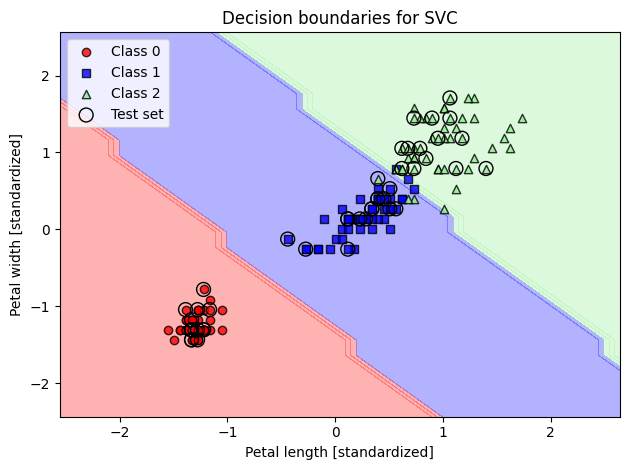

In [86]:
svc_linear = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=svc_linear,
                      test_idx=range(105, 150))

###Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

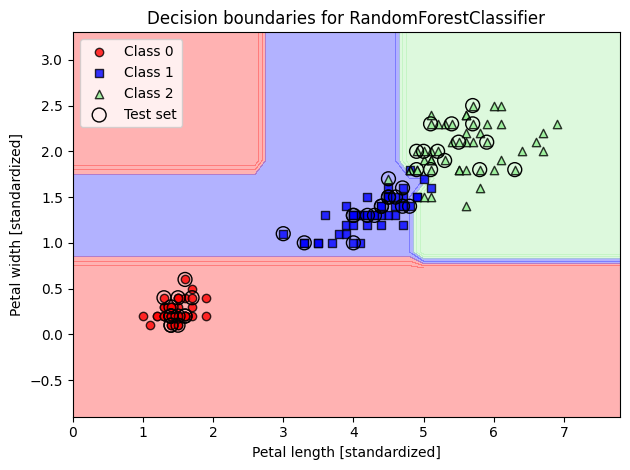

In [89]:
rfc = RandomForestClassifier().fit(X_train, y_train)
plot_decision_regions(X=X_combined,
                      y=y_combined,
                      classifier=rfc,
                      test_idx=range(105, 150))

In [90]:
y_pred = rfc.predict(X_test)
print(f'Misclassified examples: {(y_pred != y_test).sum()}')

Misclassified examples: 1
